# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris Dataset

In [2]:
data = pd.read_csv(r'iris_dataset-1-1.csv')

# Summary Statistics

In [3]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

In [61]:
corr = data.drop('species',axis=1)
corr_mtx=corr.corr()

# Exploratory Data Analysis (EDA)

In [12]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(3)

In [18]:
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [20]:
data.shape

(147, 5)

In [24]:
data1 = data.drop('species',axis=1)


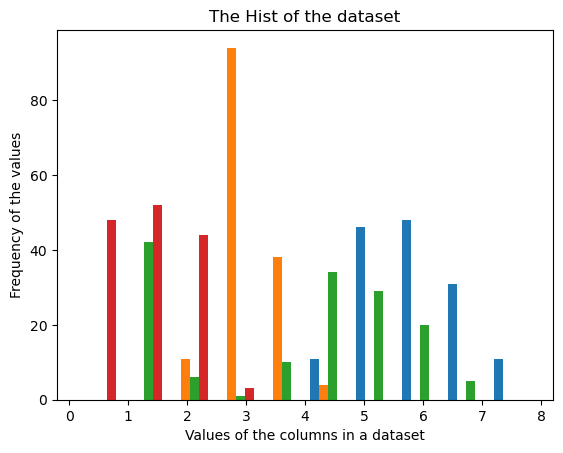

In [27]:
plt.hist(data1)
plt.xlabel('Values of the columns in a dataset')
plt.ylabel('Frequency of the values')
plt.title('The Hist of the dataset')
plt.show()

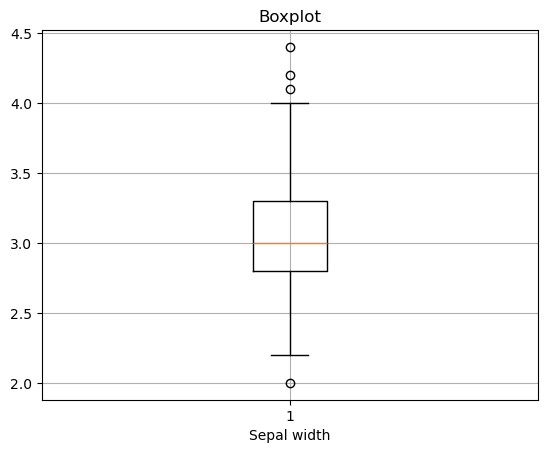

In [54]:
plt.boxplot(data1['sepal_width'])
plt.xlabel('Sepal width')
plt.title('Boxplot')
plt.grid()
plt.show()

In [32]:
data1['sepal_width'].value_counts()

sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    10
2.9    10
2.7     8
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
2.3     4
3.7     3
3.6     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64

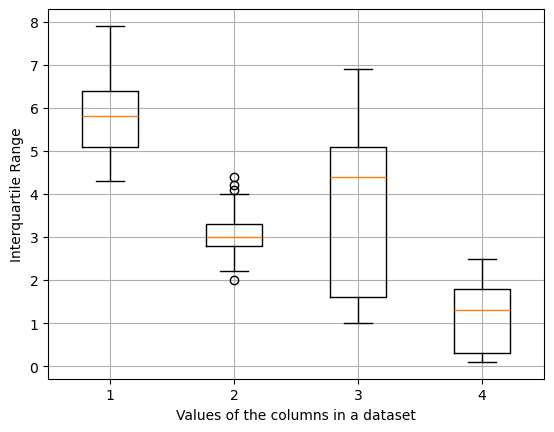

In [51]:
plt.boxplot(data1)
plt.xlabel('Values of the columns in a dataset')
plt.ylabel('Interquartile Range')
plt.title('Boxplot')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap of Feature Correlations in Iris Dataset')

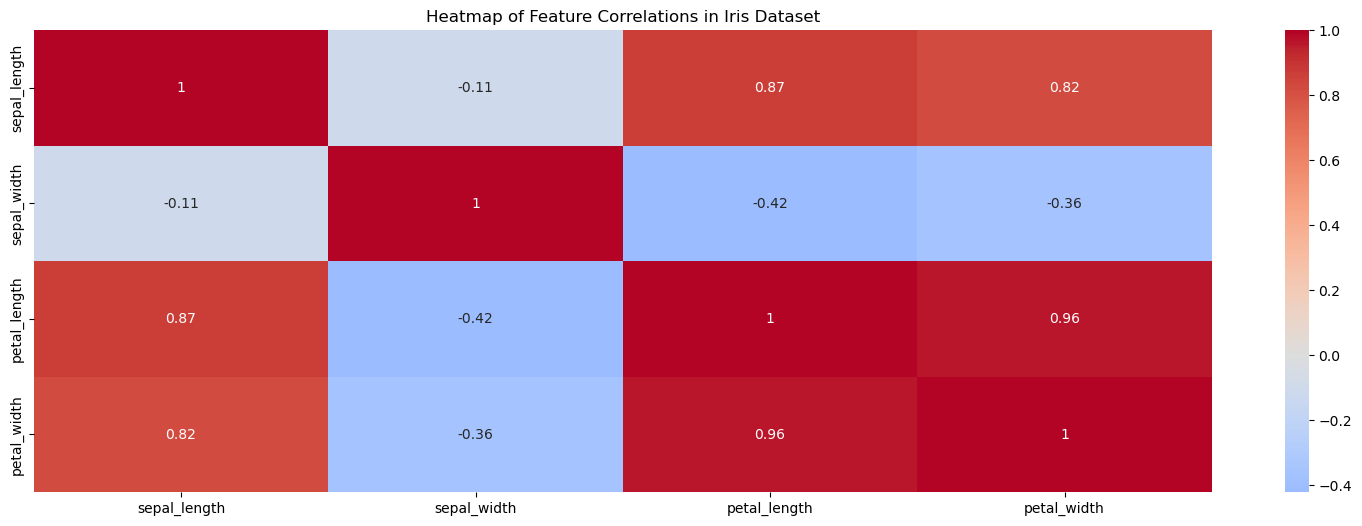

In [62]:
import seaborn as sns
plt.figure(figsize=(19, 6))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm',center=0)
plt.title('Heatmap of Feature Correlations in Iris Dataset')


# Pairplot for Visualization

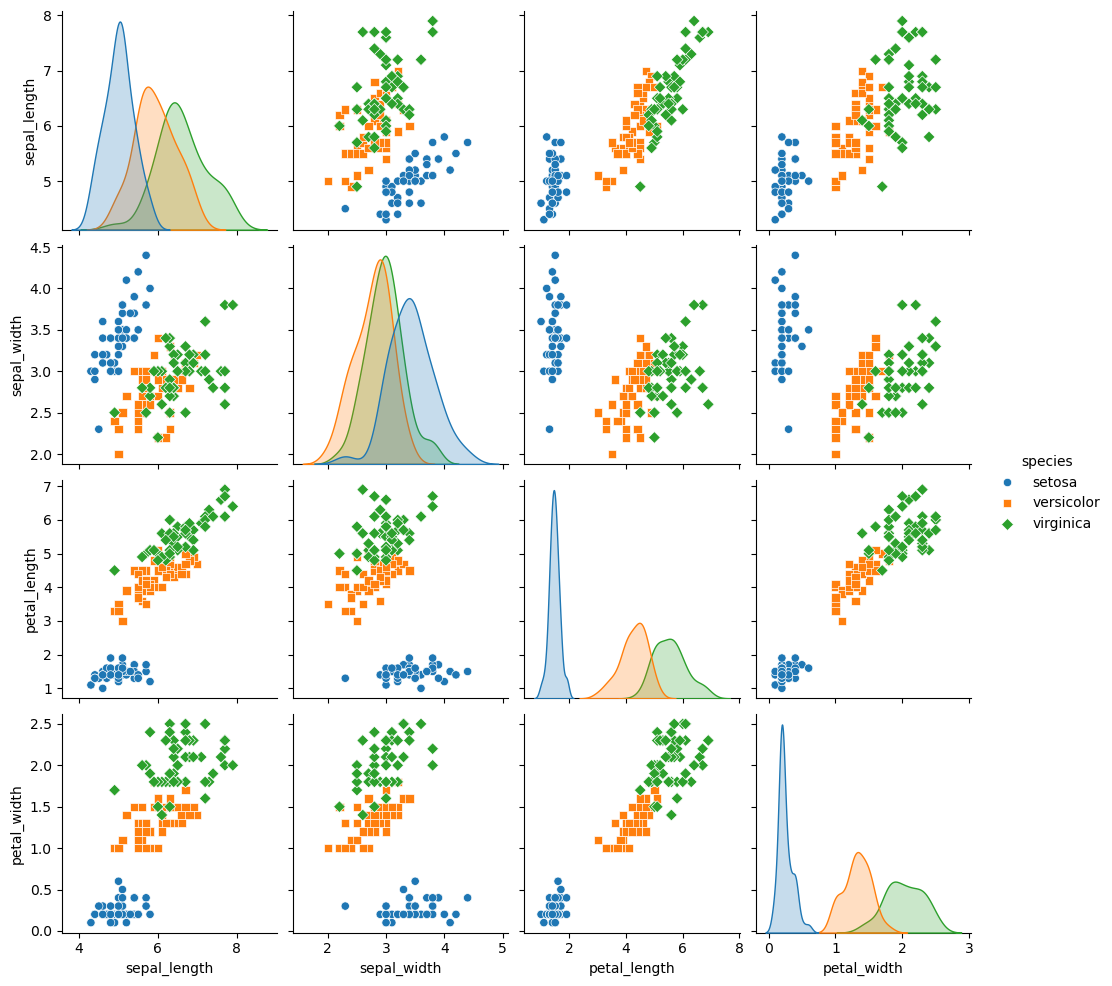

In [71]:
sns.pairplot(data,hue= 'species',markers=['o','s','D'])
plt.show()

# Split the Data into Features (X) and Target Labels (y)

In [72]:
X = data.drop('species',axis=1)

In [73]:
y = data['species']

In [74]:
X.shape

(147, 4)

In [75]:
y.shape

(147,)

# Encode Target Labels to Numerical Values

In [140]:
data['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder


In [83]:
le = LabelEncoder()
data['encoded'] = le.fit_transform(y)

In [84]:
data['encoded'].value_counts()

encoded
1    50
2    49
0    48
Name: count, dtype: int64

# Split the Data into Training and Testing Sets

In [80]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test= train_test_split(X,data['encoded'],test_size=0.2,random_state=42)

In [92]:
X_train.shape,y_train.shape

((117, 4), (117,))

In [93]:
X_test.shape,y_test.shape

((30, 4), (30,))

# Standardize Feature Values (Important for SVM)

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler= StandardScaler()

In [104]:
X_train_scaled = scaler.fit_transform(X_train)

In [105]:
X_test_scaled = scaler.transform(X_test)

# Support Vector Machines (SVM)

In [106]:
from sklearn.svm import SVC

In [107]:
model = SVC(kernel='linear',C = 1)

In [108]:
# train the SVM

In [109]:
model.fit(X_train_scaled,y_train)

SVC(C=1, kernel='linear')

# Predict Using the SVM Model

In [110]:
y_pred = model.predict(X_test_scaled)

# Calculate SVM Accuracy

In [115]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [116]:
acc=accuracy_score(y_test,y_pred)
print(f'{acc*100} %')

96.66666666666667 %


# Classification Report and Confusion Matrix for SVM

In [119]:
class_rpt = classification_report(y_test,y_pred)

In [141]:
data['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

In [122]:
print(f'{class_rpt}%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
%


In [124]:
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


#  K-Nearest Neighbors (KNN)

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn = KNeighborsClassifier(n_neighbors=3)

In [132]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict Using the KNN Model

In [133]:
y_pred = knn.predict(X_test_scaled)

# Calculate KNN Accuracy

In [134]:
acc=accuracy_score(y_test,y_pred)
print(f'{acc*100} %')

93.33333333333333 %


# Classification Report and Confusion Matrix for KNN

In [135]:
class_rpt = classification_report(y_test,y_pred)

In [136]:
print(f'{class_rpt}%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30
%


In [137]:
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [142]:
data['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64